In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score



In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/Manichellappan/DataScienceMasterclass/main/06%20-%20Linear%20Regression/Practical%20Implementation/data_assignment.csv')

In [ ]:
data

In [ ]:
data.describe()

In [ ]:
data.isna().sum()

In [ ]:
data.shape

In [ ]:
data['Item_Type'].unique()

In [ ]:
data['Item_Identifier'].unique()

In [ ]:
data['Item_Identifier'].apply(lambda x : str(x)[:2]).value_counts()

In [ ]:
data['Item_Identifier_code'] = data['Item_Identifier'].apply(lambda x : str(x)[:2])

In [ ]:
data[['Item_Identifier_code','Item_Type' ]]

In [ ]:
data.groupby('Item_Identifier_code')['Item_Type'].value_counts()

In [ ]:
data.groupby(['Item_Identifier','Item_Type'])['Item_Weight'].mean().reset_index().head(25)

In [ ]:
data.drop(columns=['Item_Weight','Item_MRP','Outlet_Establishment_Year','Item_Outlet_Sales']).plot(kind = 'box')


In [ ]:
data['Item_Weight'] = data.groupby(['Item_Identifier_code','Item_Type']).Item_Weight.transform(lambda x: x.fillna(x.mean())
                                                                   )

In [ ]:
data['Item_Weight'].isna().sum()

In [ ]:
data.head()

In [ ]:
data['Item_Fat_Content'].value_counts()

In [ ]:
data['Item_Fat_Content'].replace({'LF': 'Low Fat', 'reg':'Regular', 'low fat' : 'Low Fat'}, inplace = True)

In [20]:
data['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

<Axes: ylabel='Frequency'>

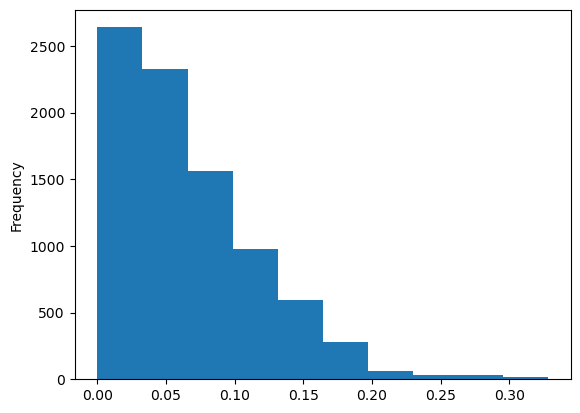

In [21]:
data['Item_Visibility'].plot(kind = 'hist')

In [22]:
data[data['Item_Visibility']==0.0].Item_Type.value_counts()


Fruits and Vegetables    87
Snack Foods              68
Household                51
Frozen Foods             51
Baking Goods             45
Dairy                    38
Soft Drinks              34
Health and Hygiene       33
Canned                   33
Meat                     20
Breads                   17
Hard Drinks              17
Starchy Foods            15
Others                   10
Seafood                   4
Breakfast                 3
Name: Item_Type, dtype: int64

In [23]:
data['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [24]:
data['Outlet_Age'] = 2023 - data['Outlet_Establishment_Year']

In [25]:
del  data['Outlet_Establishment_Year']

In [26]:
data

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDA15        9.300          Low Fat         0.016047   
1              DRC01        5.920          Regular         0.019278   
2              FDN15       17.500          Low Fat         0.016760   
3              FDX07       19.200          Regular         0.000000   
4              NCD19        8.930          Low Fat         0.000000   
...              ...          ...              ...              ...   
8518           FDF22        6.865          Low Fat         0.056783   
8519           FDS36        8.380          Regular         0.046982   
8520           NCJ29       10.600          Low Fat         0.035186   
8521           FDN46        7.210          Regular         0.145221   
8522           DRG01       14.800          Low Fat         0.044878   

                  Item_Type  Item_MRP Outlet_Identifier Outlet_Size  \
0                     Dairy  249.8092            OUT049      Medium   
1               Soft Drinks   48.2692            OUT018      Medium   
2                      Meat  141.6180            OUT049      Medium   
3     Fruits and Vegetables  182.0950            OUT010         NaN   
4                 Household   53.8614            OUT013        High   
...                     ...       ...               ...         ...   
8518            Snack Foods  214.5218            OUT013        High   
8519           Baking Goods  108.1570            OUT045         NaN   
8520     Health and Hygiene   85.1224            OUT035       Small   
8521            Snack Foods  103.1332            OUT018      Medium   
8522            Soft Drinks   75.4670            OUT046       Small   

     Outlet_Location_Type        Outlet_Type  Item_Outlet_Sales  \
0                  Tier 1  Supermarket Type1          3735.1380   
1                  Tier 3  Supermarket Type2           443.4228   
2                  Tier 1  Supermarket Type1          2097.2700   
3                  Tier 3      Grocery Store           732.3800   
4                  Tier 3  Supermarket Type1           994.7052   
...                   ...                ...                ...   
8518               Tier 3  Supermarket Type1          2778.3834   
8519               Tier 2  Supermarket Type1           549.2850   
8520               Tier 2  Supermarket Type1          1193.1136   
8521               Tier 3  Supermarket Type2          1845.5976   
8522               Tier 1  Supermarket Type1           765.6700   

     Item_Identifier_code  Outlet_Age  
0                      FD          24  
1                      DR          14  
2                      FD          24  
3                      FD          25  
4                      NC          36  
...                   ...         ...  
8518                   FD          36  
8519                   FD          21  
8520                   NC          19  
8521                   FD          14  
8522                   DR          26  

[8523 rows x 13 columns]

In [27]:
data['Outlet_Size'].isna().sum()

2410

In [28]:
data['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [29]:
data['Outlet_Size'] = data.groupby(['Outlet_Type']).Outlet_Size.transform(lambda x: x.fillna(x.mode()[0]))


In [30]:
data.isna().sum()

Item_Identifier         0
Item_Weight             0
Item_Fat_Content        0
Item_Visibility         0
Item_Type               0
Item_MRP                0
Outlet_Identifier       0
Outlet_Size             0
Outlet_Location_Type    0
Outlet_Type             0
Item_Outlet_Sales       0
Item_Identifier_code    0
Outlet_Age              0
dtype: int64

In [31]:
data['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [32]:
!pip install pandas-profiling

In [33]:
import pandas_profiling as pp

C:\Users\Vineeth Manokaran\AppData\Local\Temp\ipykernel_15520\1872674328.py:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling as pp


In [34]:
pp.ProfileReport(data)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [35]:
data['Outlet_Identifier'].nunique()

10

In [36]:
data.select_dtypes(exclude = np.number)

Item_Identifier Item_Fat_Content              Item_Type  \
0              FDA15          Low Fat                  Dairy   
1              DRC01          Regular            Soft Drinks   
2              FDN15          Low Fat                   Meat   
3              FDX07          Regular  Fruits and Vegetables   
4              NCD19          Low Fat              Household   
...              ...              ...                    ...   
8518           FDF22          Low Fat            Snack Foods   
8519           FDS36          Regular           Baking Goods   
8520           NCJ29          Low Fat     Health and Hygiene   
8521           FDN46          Regular            Snack Foods   
8522           DRG01          Low Fat            Soft Drinks   

     Outlet_Identifier Outlet_Size Outlet_Location_Type        Outlet_Type  \
0               OUT049      Medium               Tier 1  Supermarket Type1   
1               OUT018      Medium               Tier 3  Supermarket Type2   
2               OUT049      Medium               Tier 1  Supermarket Type1   
3               OUT010       Small               Tier 3      Grocery Store   
4               OUT013        High               Tier 3  Supermarket Type1   
...                ...         ...                  ...                ...   
8518            OUT013        High               Tier 3  Supermarket Type1   
8519            OUT045       Small               Tier 2  Supermarket Type1   
8520            OUT035       Small               Tier 2  Supermarket Type1   
8521            OUT018      Medium               Tier 3  Supermarket Type2   
8522            OUT046       Small               Tier 1  Supermarket Type1   

     Item_Identifier_code  
0                      FD  
1                      DR  
2                      FD  
3                      FD  
4                      NC  
...                   ...  
8518                   FD  
8519                   FD  
8520                   NC  
8521                   FD  
8522                   DR  

[8523 rows x 8 columns]

In [37]:
# Please complete this

In [38]:
#1. Drop the Item identifier
#2. convert all other categorical data to one hot
#3. concat the numerical data and one hoted categorical data
#4. split train and test
#5. build the model on train
#6. predict the train
#7. find the train error
#8. predict on test
#9. find the test error
#10. compare the train and test error

In [39]:
data.duplicated().sum()

0

In [40]:
data.drop(columns='Item_Identifier',inplace=True)

In [41]:
data['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [42]:
data_fat_content=pd.get_dummies(data['Item_Fat_Content'])

In [43]:
data['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [44]:
data_itemtype=pd.get_dummies(data['Item_Type'])

In [45]:
data['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [46]:
data_outlet_id=pd.get_dummies(data['Outlet_Identifier'])

In [47]:
data['Outlet_Size'].value_counts()

Small     4798
Medium    2793
High       932
Name: Outlet_Size, dtype: int64

In [48]:
data_outlet_size=pd.get_dummies(data['Outlet_Size'])

In [49]:
data['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [50]:
data_item_loc=pd.get_dummies(data['Outlet_Location_Type'])

In [51]:
data['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [52]:
data_outlet_type=pd.get_dummies(data['Outlet_Type'])

In [53]:
data['Item_Identifier_code'].value_counts()

FD    6125
NC    1599
DR     799
Name: Item_Identifier_code, dtype: int64

In [54]:
data_item_identifier=pd.get_dummies(data['Item_Identifier_code'])

In [55]:
data_fat_content=data_fat_content.reset_index().drop(columns='index')
data_itemtype=data_itemtype.reset_index().drop(columns='index')
data_outlet_id=data_outlet_id.reset_index().drop(columns='index')
data_outlet_size=data_outlet_size.reset_index().drop(columns='index')
data_item_loc=data_item_loc.reset_index().drop(columns='index')
data_outlet_type=data_outlet_type.reset_index().drop(columns='index')
data_item_identifier=data_item_identifier.reset_index().drop(columns='index')

In [56]:
data_number=pd.DataFrame(data.select_dtypes(include = np.number))

In [57]:
data_number=data_number.reset_index().drop(columns='index')

In [58]:
new_data=pd.concat([data_fat_content,data_itemtype,data_outlet_id,data_outlet_size,data_item_loc,data_outlet_type,data_item_identifier,data_number],axis=1)

In [59]:
new_data

Low Fat  Regular  Baking Goods  Breads  Breakfast  Canned  Dairy  \
0           1        0             0       0          0       0      1   
1           0        1             0       0          0       0      0   
2           1        0             0       0          0       0      0   
3           0        1             0       0          0       0      0   
4           1        0             0       0          0       0      0   
...       ...      ...           ...     ...        ...     ...    ...   
8518        1        0             0       0          0       0      0   
8519        0        1             1       0          0       0      0   
8520        1        0             0       0          0       0      0   
8521        0        1             0       0          0       0      0   
8522        1        0             0       0          0       0      0   

      Frozen Foods  Fruits and Vegetables  Hard Drinks  ...  \
0                0                      0            0  ...   
1                0                      0            0  ...   
2                0                      0            0  ...   
3                0                      1            0  ...   
4                0                      0            0  ...   
...            ...                    ...          ...  ...   
8518             0                      0            0  ...   
8519             0                      0            0  ...   
8520             0                      0            0  ...   
8521             0                      0            0  ...   
8522             0                      0            0  ...   

      Supermarket Type2  Supermarket Type3  DR  FD  NC  Item_Weight  \
0                     0                  0   0   1   0        9.300   
1                     1                  0   1   0   0        5.920   
2                     0                  0   0   1   0       17.500   
3                     0                  0   0   1   0       19.200   
4                     0                  0   0   0   1        8.930   
...                 ...                ...  ..  ..  ..          ...   
8518                  0                  0   0   1   0        6.865   
8519                  0                  0   0   1   0        8.380   
8520                  0                  0   0   0   1       10.600   
8521                  1                  0   0   1   0        7.210   
8522                  0                  0   1   0   0       14.800   

      Item_Visibility  Item_MRP  Item_Outlet_Sales  Outlet_Age  
0            0.016047  249.8092          3735.1380          24  
1            0.019278   48.2692           443.4228          14  
2            0.016760  141.6180          2097.2700          24  
3            0.000000  182.0950           732.3800          25  
4            0.000000   53.8614           994.7052          36  
...               ...       ...                ...         ...  
8518         0.056783  214.5218          2778.3834          36  
8519         0.046982  108.1570           549.2850          21  
8520         0.035186   85.1224          1193.1136          19  
8521         0.145221  103.1332          1845.5976          14  
8522         0.044878   75.4670           765.6700          26  

[8523 rows x 46 columns]

<Axes: >

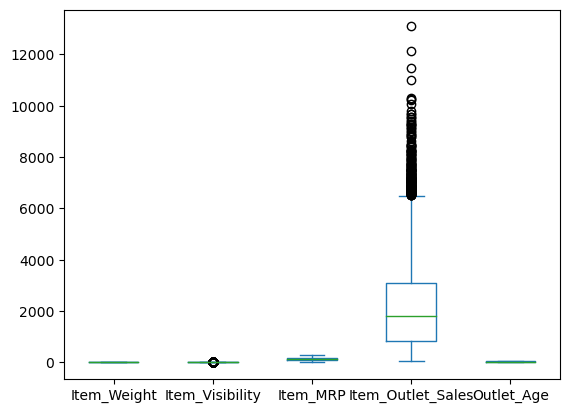

In [60]:
data_number.plot(kind='box')

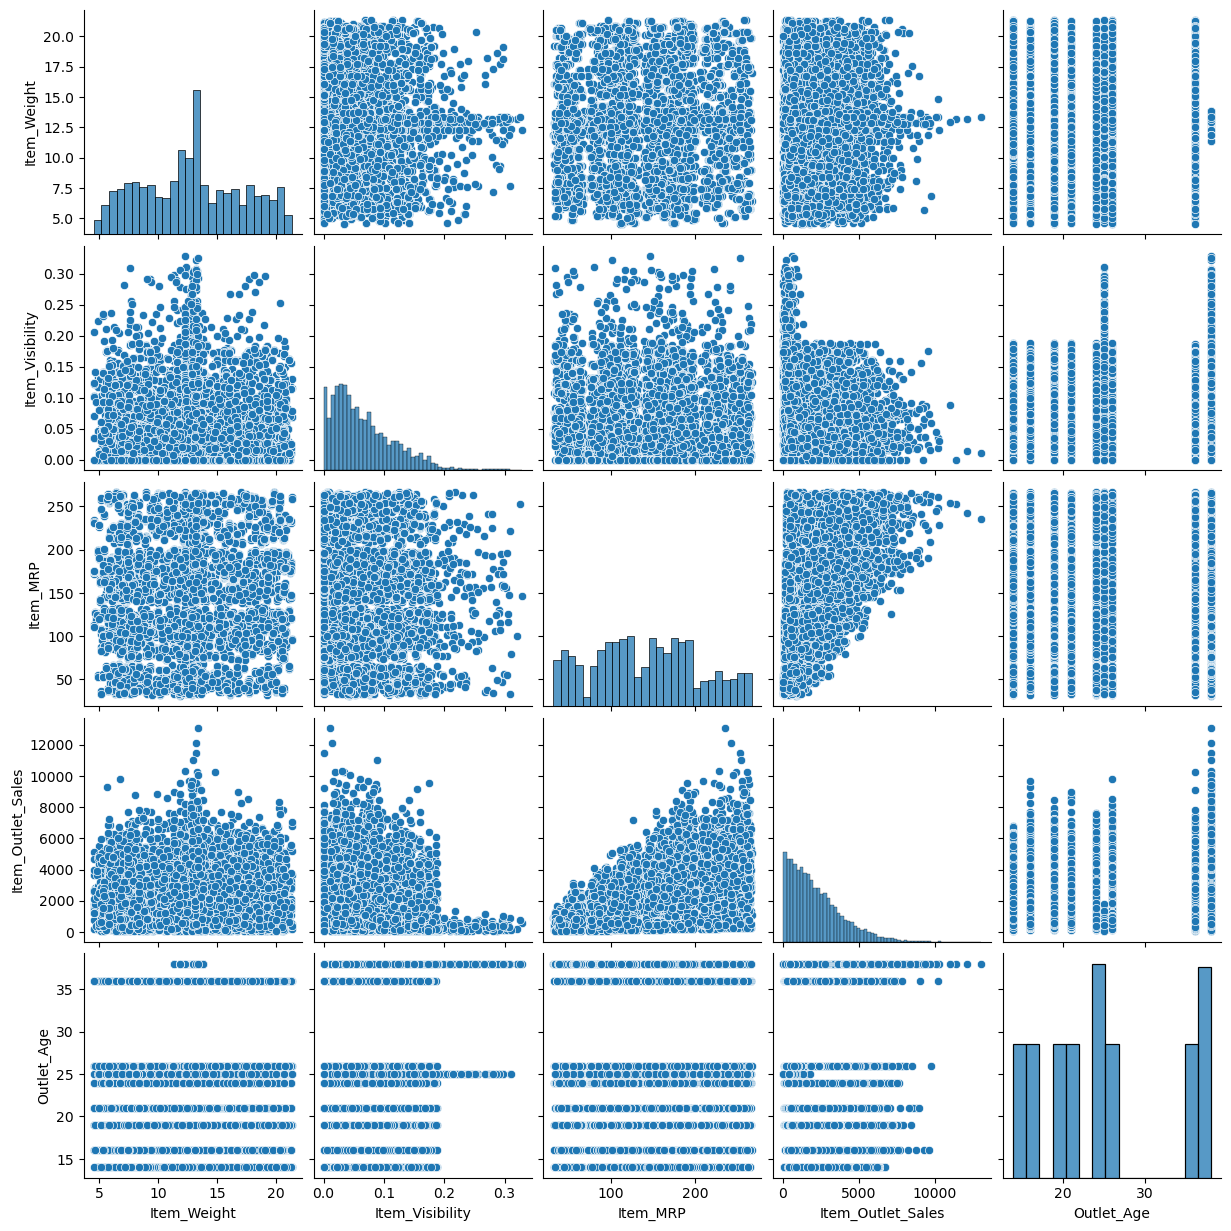

In [61]:
sns.pairplot(data)

In [62]:
data.corr()

C:\Users\Vineeth Manokaran\AppData\Local\Temp\ipykernel_15520\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


Item_Weight  Item_Visibility  Item_MRP  Item_Outlet_Sales  \
Item_Weight           1.000000        -0.011781  0.025671           0.011952   
Item_Visibility      -0.011781         1.000000 -0.001315          -0.128625   
Item_MRP              0.025671        -0.001315  1.000000           0.567574   
Item_Outlet_Sales     0.011952        -0.128625  0.567574           1.000000   
Outlet_Age            0.008329         0.074834 -0.005020           0.049135   

                   Outlet_Age  
Item_Weight          0.008329  
Item_Visibility      0.074834  
Item_MRP            -0.005020  
Item_Outlet_Sales    0.049135  
Outlet_Age           1.000000

C:\Users\Vineeth Manokaran\AppData\Local\Temp\ipykernel_15520\2578434383.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)


<Axes: >

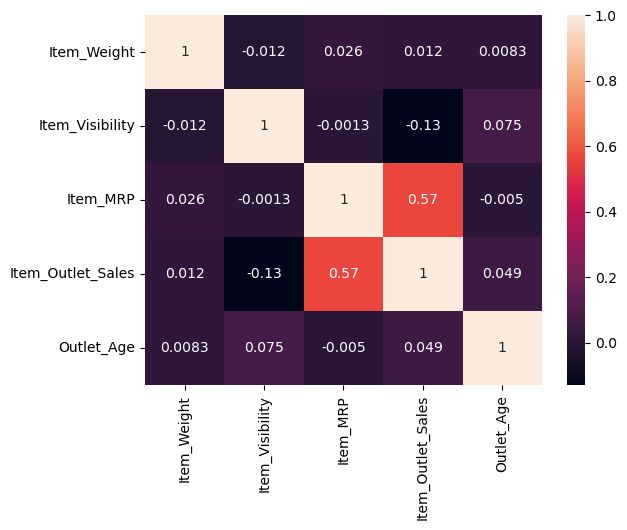

In [63]:
sns.heatmap(data.corr(),annot=True)

In [64]:
[variance_inflation_factor(data[['Item_Weight','Item_Visibility','Item_MRP','Outlet_Age']].values,i) 
 
for i in range(data[['Item_Weight','Item_Visibility','Item_MRP','Outlet_Age']].shape[1])]

[6.653500175720877, 2.530741566663221, 4.948531195259647, 6.718943634128103]

<Axes: >

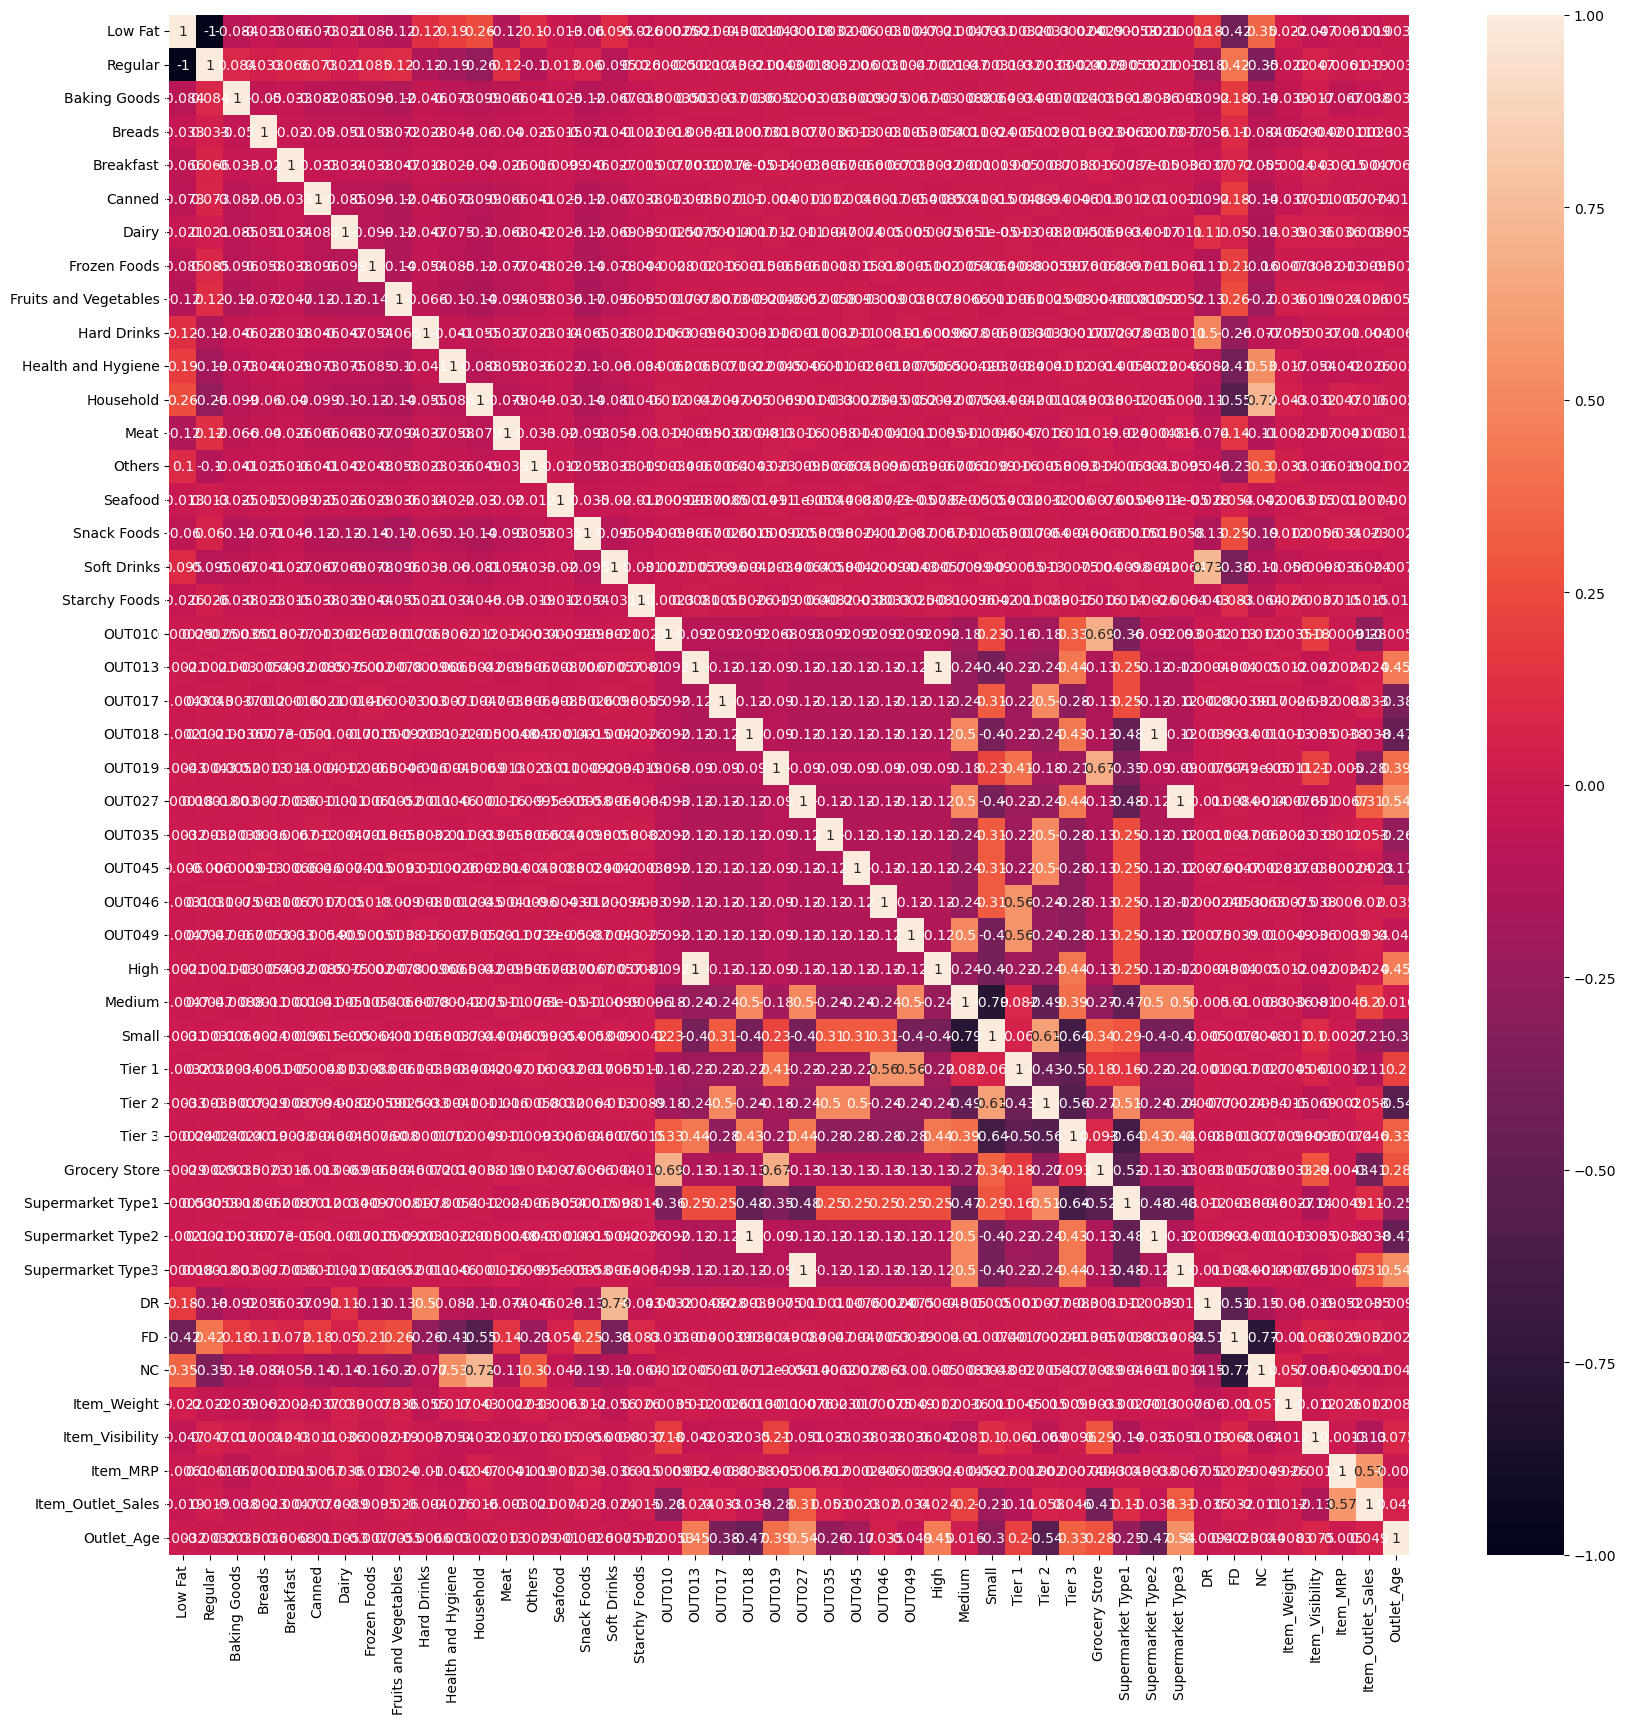

In [65]:
plt.figure(figsize=(20,20))
sns.heatmap(new_data.corr(),annot=True)

In [66]:
X=new_data.drop(columns='Item_Outlet_Sales')

In [67]:
y=new_data['Item_Outlet_Sales']

train_X,test_X,train_y,test_y,val_X,val_y = train_val_test_split(X, y, val_size=0.20 ,test_size=0.20 , random = 5)

In [68]:
train_X,test_X,train_y,test_y = train_test_split(X, y ,test_size=0.20 , random_state = 2)

In [69]:
train_X.shape , test_X.shape

((6818, 45), (1705, 45))

In [70]:
scale=StandardScaler()

In [71]:
scale.fit(train_X)

StandardScaler()

In [72]:
train_X_scaled=pd.DataFrame(scale.transform(train_X),columns=train_X.columns)
test_X_scaled=pd.DataFrame(scale.transform(test_X),columns=test_X.columns)

In [73]:
train_X_scaled

Low Fat   Regular  Baking Goods    Breads  Breakfast    Canned  \
0    -1.363781  1.363781     -0.285544 -0.176509  -0.118872 -0.287941   
1     0.733255 -0.733255      3.502084 -0.176509  -0.118872 -0.287941   
2     0.733255 -0.733255     -0.285544 -0.176509  -0.118872  3.472939   
3     0.733255 -0.733255     -0.285544 -0.176509  -0.118872 -0.287941   
4    -1.363781  1.363781     -0.285544 -0.176509  -0.118872 -0.287941   
...        ...       ...           ...       ...        ...       ...   
6813  0.733255 -0.733255     -0.285544 -0.176509  -0.118872 -0.287941   
6814  0.733255 -0.733255     -0.285544 -0.176509  -0.118872 -0.287941   
6815 -1.363781  1.363781     -0.285544 -0.176509  -0.118872 -0.287941   
6816  0.733255 -0.733255     -0.285544 -0.176509  -0.118872 -0.287941   
6817 -1.363781  1.363781      3.502084 -0.176509  -0.118872 -0.287941   

         Dairy  Frozen Foods  Fruits and Vegetables  Hard Drinks  ...  \
0    -0.292101     -0.336637               -0.40727    -0.158458  ...   
1    -0.292101     -0.336637               -0.40727    -0.158458  ...   
2    -0.292101     -0.336637               -0.40727    -0.158458  ...   
3    -0.292101      2.970557               -0.40727    -0.158458  ...   
4    -0.292101     -0.336637               -0.40727    -0.158458  ...   
...        ...           ...                    ...          ...  ...   
6813 -0.292101     -0.336637               -0.40727    -0.158458  ...   
6814 -0.292101     -0.336637               -0.40727    -0.158458  ...   
6815 -0.292101     -0.336637               -0.40727    -0.158458  ...   
6816 -0.292101     -0.336637               -0.40727     6.310812  ...   
6817 -0.292101     -0.336637               -0.40727    -0.158458  ...   

      Supermarket Type1  Supermarket Type2  Supermarket Type3        DR  \
0              0.722174          -0.346012          -0.347604 -0.320748   
1             -1.384708          -0.346012           2.876837 -0.320748   
2              0.722174          -0.346012          -0.347604 -0.320748   
3              0.722174          -0.346012          -0.347604 -0.320748   
4             -1.384708          -0.346012          -0.347604 -0.320748   
...                 ...                ...                ...       ...   
6813           0.722174          -0.346012          -0.347604 -0.320748   
6814           0.722174          -0.346012          -0.347604 -0.320748   
6815           0.722174          -0.346012          -0.347604 -0.320748   
6816           0.722174          -0.346012          -0.347604  3.117712   
6817          -1.384708           2.890076          -0.347604 -0.320748   

            FD        NC  Item_Weight  Item_Visibility  Item_MRP  Outlet_Age  
0     0.625869 -0.481454    -0.241353        -0.170030  0.142044    0.099938  
1     0.625869 -0.481454    -0.128826        -1.285498 -0.658577    1.533910  
2     0.625869 -0.481454    -1.202452        -0.357270  1.736475    0.099938  
3     0.625869 -0.481454    -0.547961        -0.264562 -0.826672    0.099938  
4     0.625869 -0.481454     0.038811         3.296290 -1.526724    1.533910  
...        ...       ...          ...              ...       ...         ...  
6813  0.625869 -0.481454    -1.318020         0.656367  0.847977    0.099938  
6814  0.625869 -0.481454     1.539333         1.008758  1.345789    0.099938  
6815  0.625869 -0.481454     1.386029         0.503551  0.678908   -1.095039  
6816 -1.597777 -0.481454    -0.930042         0.403726  0.184354   -0.497551  
6817  0.625869 -0.481454    -1.460710         0.743449  0.420398   -1.334034  

[6818 rows x 45 columns]

In [74]:
test_X_scaled

Low Fat   Regular  Baking Goods    Breads  Breakfast    Canned  \
0     0.733255 -0.733255     -0.285544 -0.176509  -0.118872 -0.287941   
1     0.733255 -0.733255     -0.285544 -0.176509  -0.118872 -0.287941   
2     0.733255 -0.733255     -0.285544 -0.176509  -0.118872 -0.287941   
3     0.733255 -0.733255     -0.285544 -0.176509  -0.118872 -0.287941   
4     0.733255 -0.733255     -0.285544 -0.176509  -0.118872 -0.287941   
...        ...       ...           ...       ...        ...       ...   
1700  0.733255 -0.733255     -0.285544 -0.176509  -0.118872 -0.287941   
1701 -1.363781  1.363781     -0.285544 -0.176509  -0.118872 -0.287941   
1702  0.733255 -0.733255     -0.285544 -0.176509  -0.118872 -0.287941   
1703  0.733255 -0.733255     -0.285544 -0.176509  -0.118872 -0.287941   
1704 -1.363781  1.363781     -0.285544 -0.176509  -0.118872 -0.287941   

         Dairy  Frozen Foods  Fruits and Vegetables  Hard Drinks  ...  \
0    -0.292101     -0.336637               2.455375    -0.158458  ...   
1    -0.292101      2.970557              -0.407270    -0.158458  ...   
2     3.423470     -0.336637              -0.407270    -0.158458  ...   
3    -0.292101     -0.336637              -0.407270    -0.158458  ...   
4    -0.292101      2.970557              -0.407270    -0.158458  ...   
...        ...           ...                    ...          ...  ...   
1700 -0.292101     -0.336637              -0.407270    -0.158458  ...   
1701 -0.292101     -0.336637               2.455375    -0.158458  ...   
1702 -0.292101     -0.336637              -0.407270    -0.158458  ...   
1703 -0.292101     -0.336637              -0.407270    -0.158458  ...   
1704 -0.292101     -0.336637               2.455375    -0.158458  ...   

      Supermarket Type1  Supermarket Type2  Supermarket Type3        DR  \
0             -1.384708          -0.346012           2.876837 -0.320748   
1              0.722174          -0.346012          -0.347604 -0.320748   
2              0.722174          -0.346012          -0.347604 -0.320748   
3             -1.384708          -0.346012          -0.347604 -0.320748   
4             -1.384708          -0.346012          -0.347604 -0.320748   
...                 ...                ...                ...       ...   
1700          -1.384708          -0.346012           2.876837 -0.320748   
1701           0.722174          -0.346012          -0.347604 -0.320748   
1702           0.722174          -0.346012          -0.347604 -0.320748   
1703          -1.384708           2.890076          -0.347604 -0.320748   
1704           0.722174          -0.346012          -0.347604 -0.320748   

            FD        NC  Item_Weight  Item_Visibility  Item_MRP  Outlet_Age  
0     0.625869 -0.481454     0.094682         0.652190 -1.058993    1.533910  
1     0.625869 -0.481454    -0.158805         1.267960  1.700088   -0.497551  
2     0.625869 -0.481454    -1.656468         1.263599 -0.856669   -0.497551  
3    -1.597777  2.077043     0.985080         0.412089 -0.257696   -0.019560  
4     0.625869 -0.481454     0.010316        -1.099297 -0.620583    1.533910  
...        ...       ...          ...              ...       ...         ...  
1700  0.625869 -0.481454     0.038811        -0.556922 -0.238445    1.533910  
1701  0.625869 -0.481454     1.692637        -0.739271 -1.516528   -0.736546  
1702 -1.597777  2.077043     1.480370         2.177615  0.503874   -1.095039  
1703  0.625869 -0.481454     1.386029        -1.285498  1.857987   -1.334034  
1704  0.625869 -0.481454    -1.425332         0.384782  1.404642   -0.497551  

[1705 rows x 45 columns]

# MODELLING

# Item Weight

<Axes: xlabel='Item_Weight', ylabel='Item_Outlet_Sales'>

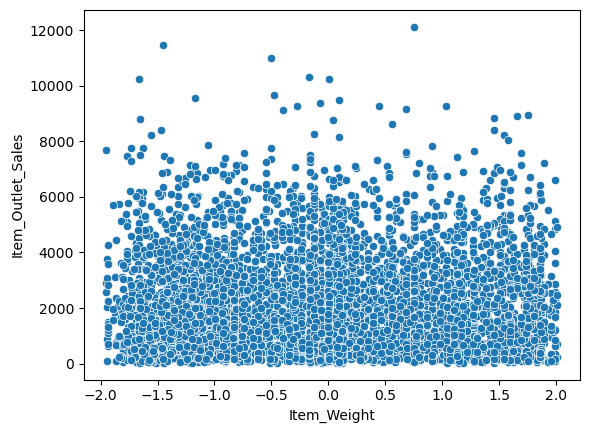

In [75]:
sns.scatterplot(x=train_X_scaled['Item_Weight'],y=train_y)

In [76]:
reg = LinearRegression()

In [77]:
reg.fit(train_X_scaled[['Item_Weight']], train_y)

LinearRegression()

In [78]:
reg.intercept_

2167.583479847463

In [79]:
reg.coef_

array([8.62903014])

In [80]:
train_X_scaled

Low Fat   Regular  Baking Goods    Breads  Breakfast    Canned  \
0    -1.363781  1.363781     -0.285544 -0.176509  -0.118872 -0.287941   
1     0.733255 -0.733255      3.502084 -0.176509  -0.118872 -0.287941   
2     0.733255 -0.733255     -0.285544 -0.176509  -0.118872  3.472939   
3     0.733255 -0.733255     -0.285544 -0.176509  -0.118872 -0.287941   
4    -1.363781  1.363781     -0.285544 -0.176509  -0.118872 -0.287941   
...        ...       ...           ...       ...        ...       ...   
6813  0.733255 -0.733255     -0.285544 -0.176509  -0.118872 -0.287941   
6814  0.733255 -0.733255     -0.285544 -0.176509  -0.118872 -0.287941   
6815 -1.363781  1.363781     -0.285544 -0.176509  -0.118872 -0.287941   
6816  0.733255 -0.733255     -0.285544 -0.176509  -0.118872 -0.287941   
6817 -1.363781  1.363781      3.502084 -0.176509  -0.118872 -0.287941   

         Dairy  Frozen Foods  Fruits and Vegetables  Hard Drinks  ...  \
0    -0.292101     -0.336637               -0.40727    -0.158458  ...   
1    -0.292101     -0.336637               -0.40727    -0.158458  ...   
2    -0.292101     -0.336637               -0.40727    -0.158458  ...   
3    -0.292101      2.970557               -0.40727    -0.158458  ...   
4    -0.292101     -0.336637               -0.40727    -0.158458  ...   
...        ...           ...                    ...          ...  ...   
6813 -0.292101     -0.336637               -0.40727    -0.158458  ...   
6814 -0.292101     -0.336637               -0.40727    -0.158458  ...   
6815 -0.292101     -0.336637               -0.40727    -0.158458  ...   
6816 -0.292101     -0.336637               -0.40727     6.310812  ...   
6817 -0.292101     -0.336637               -0.40727    -0.158458  ...   

      Supermarket Type1  Supermarket Type2  Supermarket Type3        DR  \
0              0.722174          -0.346012          -0.347604 -0.320748   
1             -1.384708          -0.346012           2.876837 -0.320748   
2              0.722174          -0.346012          -0.347604 -0.320748   
3              0.722174          -0.346012          -0.347604 -0.320748   
4             -1.384708          -0.346012          -0.347604 -0.320748   
...                 ...                ...                ...       ...   
6813           0.722174          -0.346012          -0.347604 -0.320748   
6814           0.722174          -0.346012          -0.347604 -0.320748   
6815           0.722174          -0.346012          -0.347604 -0.320748   
6816           0.722174          -0.346012          -0.347604  3.117712   
6817          -1.384708           2.890076          -0.347604 -0.320748   

            FD        NC  Item_Weight  Item_Visibility  Item_MRP  Outlet_Age  
0     0.625869 -0.481454    -0.241353        -0.170030  0.142044    0.099938  
1     0.625869 -0.481454    -0.128826        -1.285498 -0.658577    1.533910  
2     0.625869 -0.481454    -1.202452        -0.357270  1.736475    0.099938  
3     0.625869 -0.481454    -0.547961        -0.264562 -0.826672    0.099938  
4     0.625869 -0.481454     0.038811         3.296290 -1.526724    1.533910  
...        ...       ...          ...              ...       ...         ...  
6813  0.625869 -0.481454    -1.318020         0.656367  0.847977    0.099938  
6814  0.625869 -0.481454     1.539333         1.008758  1.345789    0.099938  
6815  0.625869 -0.481454     1.386029         0.503551  0.678908   -1.095039  
6816 -1.597777 -0.481454    -0.930042         0.403726  0.184354   -0.497551  
6817  0.625869 -0.481454    -1.460710         0.743449  0.420398   -1.334034  

[6818 rows x 45 columns]

In [81]:
train_predict=reg.predict(train_X_scaled[['Item_Weight']])

In [82]:
train_predict

array([2165.50083719, 2166.47183732, 2157.20748682, ..., 2179.54356541,
       2159.55811742, 2154.97896691])

Text(0, 0.5, 'Item_Outlet_Sales')

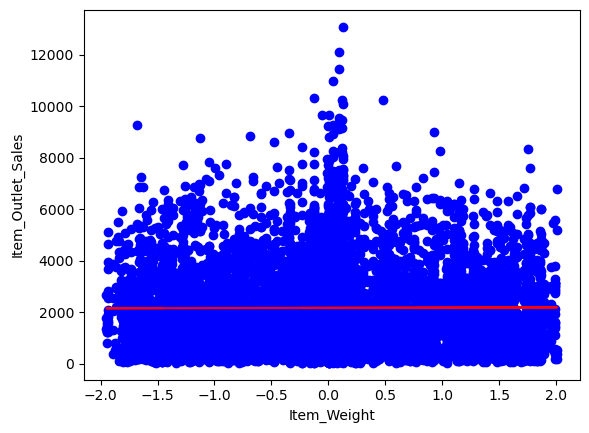

In [83]:
plt.scatter(train_X_scaled['Item_Weight'], train_y, color = 'blue')
plt.plot(train_X_scaled['Item_Weight'], reg.predict(train_X_scaled[['Item_Weight']]), color = 'red')
plt.xlabel("Item_Weight")
plt.ylabel('Item_Outlet_Sales')

In [87]:
test_predict = reg.predict(test_X[['Item_Weight']])

In [88]:
test_predict

array([2281.70041341, 2272.42619602, 2217.63185465, ..., 2332.39795548,
       2328.94634342, 2226.08830418])

In [89]:
plt.scatter(test_X_scaled['Item_Weight'], test_y, color = 'blue')
plt.plot(test_X_scaled['Item_Weight'], reg.predict(test_X_scaled[['Item_Weight']]), color = 'red')
plt.plot(train_X_scaled['Item_Weight'], reg.predict(train_X_scaled[['Item_Weight']]), color = 'green')
plt.xlabel("Item_Weight")
plt.xlabel("Item_Weight")
plt.ylabel('Item_Outlet_Sales')

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

## ERROR METRICS

In [90]:
def returnError(actual,predict):
    mse  = mean_squared_error(actual,predict)
    rmse = np.sqrt(mean_squared_error(actual,predict))
    mae  = mean_absolute_error(actual,predict)
    mape = mean_absolute_percentage_error(actual,predict)
    r2   = r2_score(actual,predict)
    
    print("MSE = ", mse)
    print("RMSE = ", rmse)
    print("MAE = ", mae)
    print("MAPE = ", mape)
    print("R2 Score = ", r2)
    

In [91]:
print('TRAIN ERROR')
returnError(train_y,reg.predict(train_X[['Item_Weight']]))

TRAIN ERROR
MSE =  2879979.779801546
RMSE =  1697.0503174041557
MAE =  1357.2681509896618
MAPE =  2.324392352305889
R2 Score =  -0.0045172946249492085


# Modeling with Item_Visibility And Sales



In [92]:
reg = LinearRegression()

In [93]:
reg.fit(train_X_scaled[['Item_Visibility']],train_y)

LinearRegression()

In [94]:
reg.intercept_

2167.583479847463

In [95]:
reg.coef_

array([-210.05810628])

In [96]:
train_predict=reg.predict(train_X_scaled[['Item_Visibility']])

Text(0, 0.5, 'Item_Outlet_Sales')

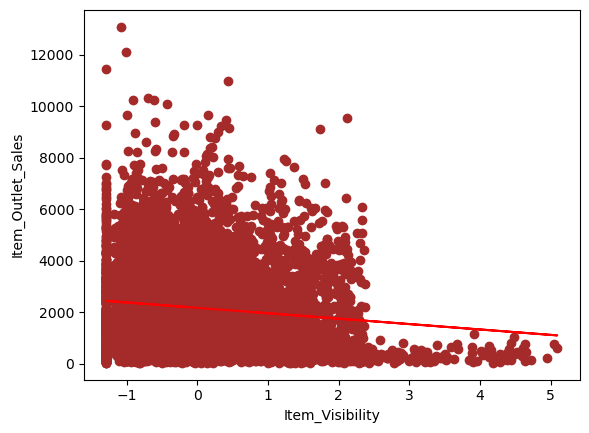

In [97]:
plt.scatter(train_X_scaled['Item_Visibility'], train_y, color = 'brown')
plt.plot(train_X_scaled['Item_Visibility'], reg.predict(train_X_scaled[['Item_Visibility']]), color = 'red')
plt.xlabel("Item_Visibility")
plt.ylabel('Item_Outlet_Sales')

In [105]:
test_predict = reg.predict(test_X[['Item_Visibility']])

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Item_Visibility
Feature names seen at fit time, yet now missing:
- Item_MRP


In [99]:
test_predict

array([2281.70041341, 2272.42619602, 2217.63185465, ..., 2332.39795548,
       2328.94634342, 2226.08830418])

In [100]:
plt.scatter(test_X_scaled['Item_Visibility'], test_y, color = 'blue')
plt.plot(test_X_scaled['Item_Visibility'], reg.predict(test_X_scaled[['Item_Weight']]), color = 'red')
plt.plot(train_X_scaled['Item_Visibility'], reg.predict(train_X_scaled[['Item_Weight']]), color = 'green')
plt.xlabel("Item_Visibility")
plt.ylabel('Item_Outlet_Sales')

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

# Modeling with Item_MRP And Sales

In [101]:
reg = LinearRegression()

In [102]:
reg.fit(train_X_scaled[['Item_MRP']],train_y)

LinearRegression()

In [103]:
reg.intercept_

2167.583479847463

In [104]:
reg.coef_

array([971.37915318])

In [106]:
train_predict = reg.predict(train_X_scaled[['Item_MRP']])

Text(0, 0.5, 'Item_Outlet_Sales')

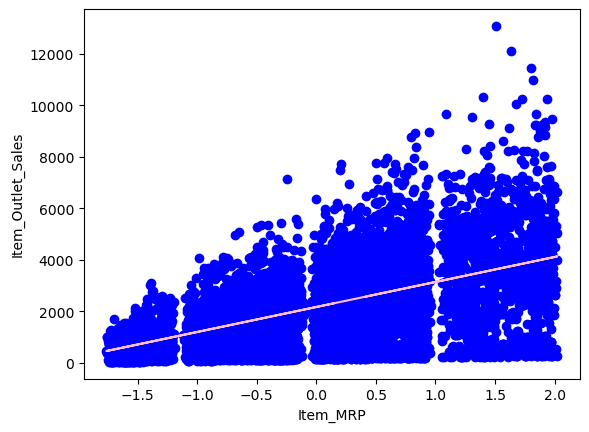

In [121]:
plt.scatter(train_X_scaled['Item_MRP'], train_y, color = 'blue')
plt.plot(train_X_scaled['Item_MRP'], train_predict, color = 'pink')
plt.xlabel("Item_MRP")
plt.ylabel('Item_Outlet_Sales')

In [ ]:
test_predict = reg.predict(test_X_scaled[['Item_MRP']])